/tank/WSI_data/Ovarian_WSIs/TCGA-OV/slides/TCGA-57-1994-01Z-00-DX1.A0798185-30C5-4C32-B1A8-B440D4F4ED95.svs
/tank/WSI_data/Ovarian_WSIs/TCGA-OV/slides/TCGA-23-1027-01Z-00-DX1.53F9DFF4-6811-4184-B2FD-1F6706B948FD.svs
/tank/WSI_data/Ovarian_WSIs/TCGA-OV/slides/TCGA-42-2593-01Z-00-DX1.9d506f1d-a5b3-4643-bd12-91c33fae4286.svs
/tank/WSI_data/Ovarian_WSIs/TCGA-OV/slides/TCGA-OY-A56Q-01Z-00-DX1.F1556F26-8845-4962-9004-70F9747B46B7.svs
/tank/WSI_data/Ovarian_WSIs/TCGA-OV/slides/TCGA-25-1323-01Z-00-DX1.1B82D1C9-2310-4AAB-B531-45C1191E5FF8.svs
/tank/WSI_data/Ovarian_WSIs/TCGA-OV/slides/TCGA-25-2409-01Z-00-DX1.34FFD6A9-4919-4DF5-8415-215CC833F12D.svs
/tank/WSI_data/Ovarian_WSIs/TCGA-OV/slides/TCGA-25-1314-01Z-00-DX1.E01C2237-E2D6-4D84-9FB4-624734F30375.svs
/tank/WSI_data/Ovarian_WSIs/TCGA-OV/slides/TCGA-WR-A838-01Z-00-DX1.5FE22DE4-CEFB-45F6-9299-505023A8F3BA.svs
/tank/WSI_data/Ovarian_WSIs/TCGA-OV/slides/TCGA-25-2392-01Z-00-DX1.C37932E5-973F-444D-8CEB-1BED4279165E.svs
/tank/WSI_data/Ovarian_WSIs/

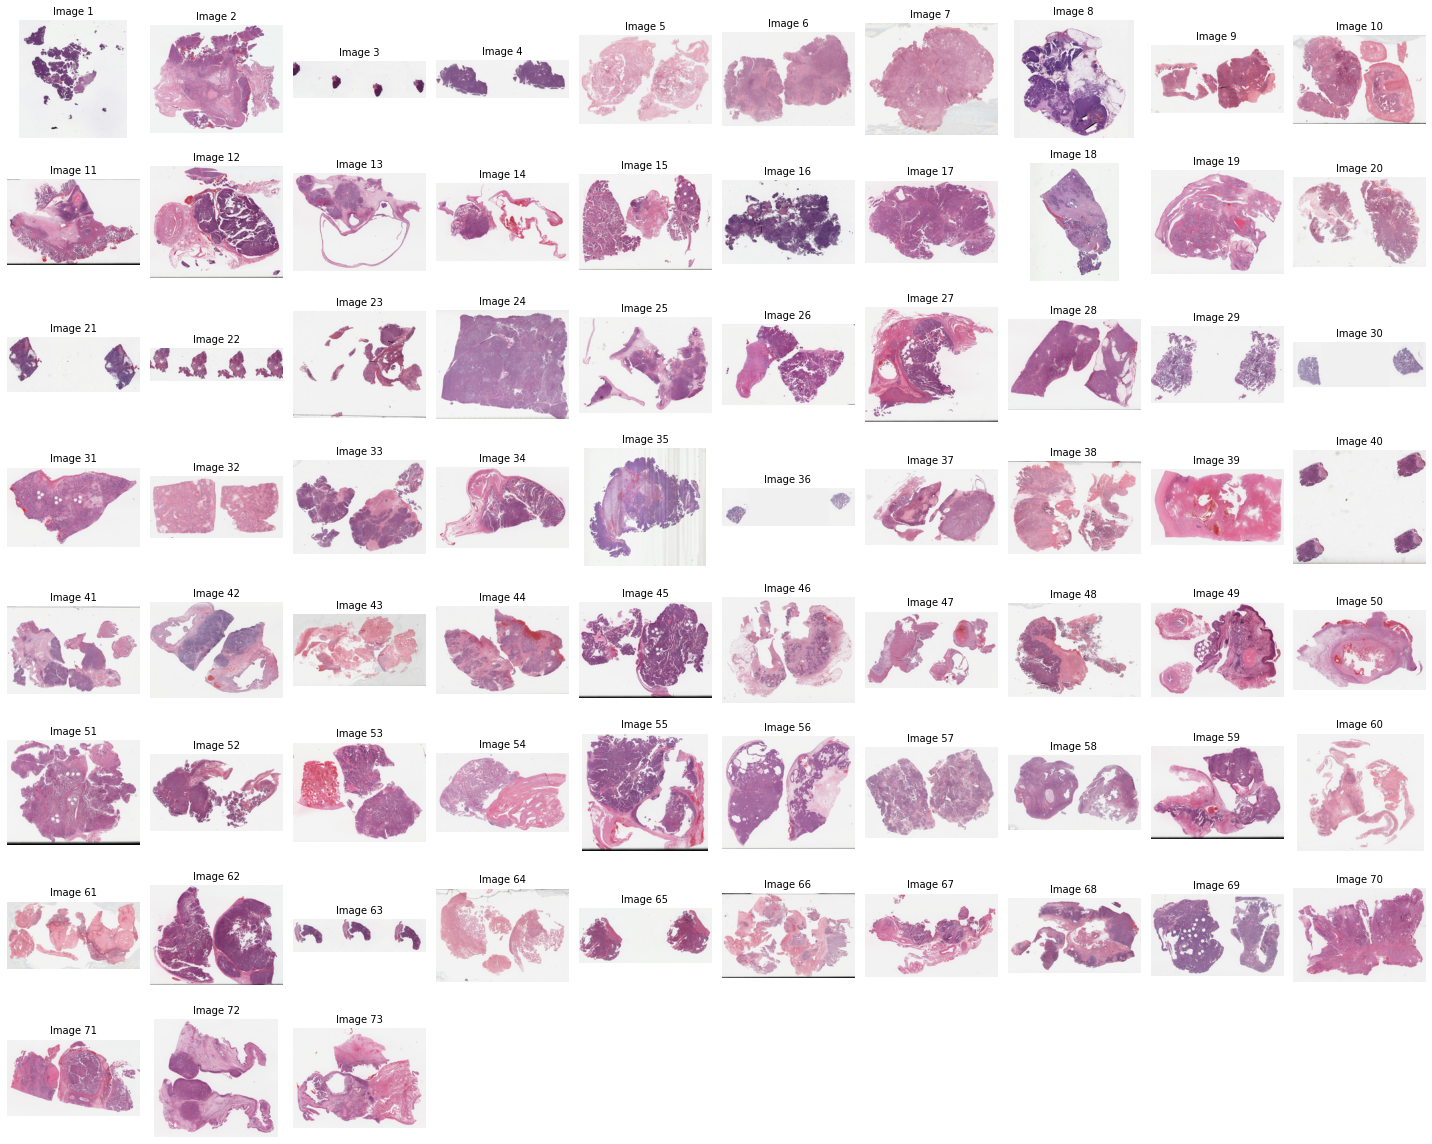

In [10]:
import openslide
import pandas as pd
import matplotlib.pyplot as plt
import os

# Read CSV file
csv_path = '/tank/WSI_data/Ovarian_WSIs/TCGA-OV/CLAM/level_0/patches/BRCA_pos_neg_FFPE.csv'  # Replace with your CSV file path
df = pd.read_csv(csv_path)

# Define the folder where your .svs files are stored
svs_folder = '/tank/WSI_data/Ovarian_WSIs/TCGA-OV/slides/'  # Replace with the path to your folder

# Set thumbnail size
thumbnail_size = (200, 200)  # You can adjust the size

# Create a figure for plotting
n_images = len(df)
n_cols = 10  # You can adjust the number of columns
n_rows = (n_images + n_cols - 1) // n_cols  # Calculate the number of rows needed

plt.figure(figsize=(20, n_rows * 2))  # Adjust the figure size as needed

# Loop through the images and create thumbnails
for i, row in df.iterrows():
    svs_path = os.path.join(svs_folder, row['slide_id'] + '.svs')  # Replace 'image_column' with the actual column name containing the image paths
    print(svs_path)
    slide = openslide.OpenSlide(svs_path)
    thumbnail = slide.get_thumbnail(thumbnail_size)
    
    # Plot each thumbnail
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(thumbnail)
    plt.axis('off')  # Hide the axes
    plt.title(f'Image {i+1}', fontsize=10)  # You can customize the title

plt.tight_layout()
plt.show()

In [11]:
target_image = thumbnail.copy()

/tank/WSI_data/Ovarian_WSIs/BRCA_blind_test/slides/SZ347_23-1-3-1.mrxs
/tank/WSI_data/Ovarian_WSIs/BRCA_blind_test/slides/SZ3646_22-1-1-1.mrxs
/tank/WSI_data/Ovarian_WSIs/BRCA_blind_test/slides/SZ1188_17-4-5-1.mrxs
/tank/WSI_data/Ovarian_WSIs/BRCA_blind_test/slides/SZ1075_23-2-2-1.mrxs


/tank/WSI_data/Ovarian_WSIs/BRCA_blind_test/slides/MP685_22-1-1-1.mrxs
/tank/WSI_data/Ovarian_WSIs/BRCA_blind_test/slides/SZ9480_22-6-3-1.mrxs
/tank/WSI_data/Ovarian_WSIs/BRCA_blind_test/slides/MP2841_23-1-1-1.mrxs
/tank/WSI_data/Ovarian_WSIs/BRCA_blind_test/slides/SZ8493_15-6-4-1.mrxs
/tank/WSI_data/Ovarian_WSIs/BRCA_blind_test/slides/8.mrxs
/tank/WSI_data/Ovarian_WSIs/BRCA_blind_test/slides/SZ4863_22-2-2-1.mrxs
/tank/WSI_data/Ovarian_WSIs/BRCA_blind_test/slides/SZ4970_22-1-8-1.mrxs
/tank/WSI_data/Ovarian_WSIs/BRCA_blind_test/slides/SZ8502_22-1-4-1.mrxs
/tank/WSI_data/Ovarian_WSIs/BRCA_blind_test/slides/SZ7283_22-1-14-1.mrxs
/tank/WSI_data/Ovarian_WSIs/BRCA_blind_test/slides/MP295_22-1-1-1.mrxs
/tank/WSI_data/Ovarian_WSIs/BRCA_blind_test/slides/SZ1138_23-3-21-1.mrxs
/tank/WSI_data/Ovarian_WSIs/BRCA_blind_test/slides/SZ6773_22-1-16-1.mrxs
/tank/WSI_data/Ovarian_WSIs/BRCA_blind_test/slides/slide-2023-08-28T17-22-13-R2-S16.mrxs
/tank/WSI_data/Ovarian_WSIs/BRCA_blind_test/slides/MP2884_23

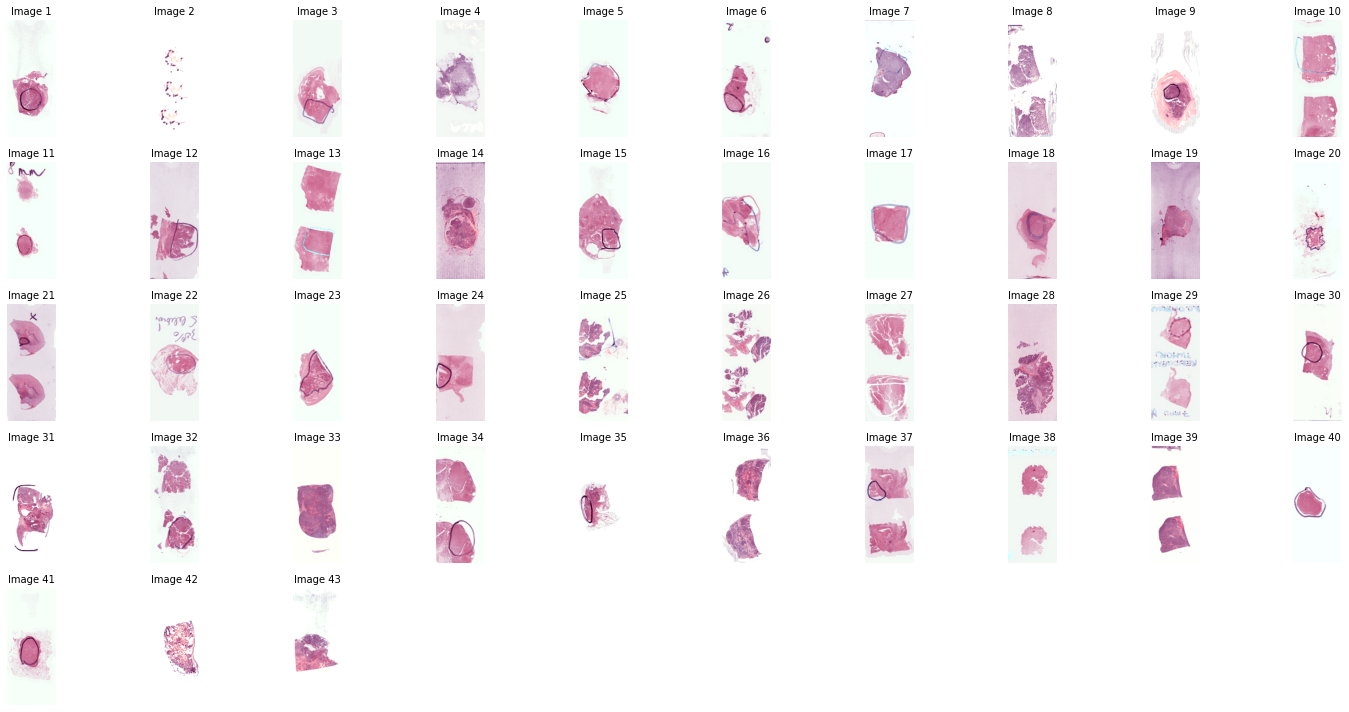

In [12]:
import openslide
import matplotlib.pyplot as plt
import os
from torchvision import transforms
import torchstain
from matplotlib import pyplot as plt
import numpy as np
import cv2


# Path to the folder containing .mrxs files
mrxs_folder = '/tank/WSI_data/Ovarian_WSIs/BRCA_blind_test/slides/'  # Replace with the path to your folder

# Collect all .mrxs files in the folder
mrxs_files = [f for f in os.listdir(mrxs_folder) if f.endswith('.mrxs')]

# Set thumbnail size
thumbnail_size = (200, 200)  # You can adjust the size

# Create a figure for plotting
n_images = len(mrxs_files)
n_cols = 10  # Adjust the number of columns as needed
n_rows = (n_images + n_cols - 1) // n_cols  # Calculate the number of rows needed

plt.figure(figsize=(20, n_rows * 2))  # Adjust the figure size as needed

# Loop through the .mrxs files and create thumbnails
for i, file_name in enumerate(mrxs_files):

    file_path = os.path.join(mrxs_folder, file_name)

    print(file_path)
    
    slide = openslide.OpenSlide(file_path)
    thumbnail = slide.get_thumbnail(thumbnail_size)


    # Convert to RGB format
    target_image = cv2.cvtColor(np.array(target_image), cv2.COLOR_RGBA2RGB)
    source_image = cv2.cvtColor(np.array(thumbnail), cv2.COLOR_RGBA2RGB)

    # Your existing code for normalization
    T = transforms.Compose([
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x*255)
    ])

    normalizer = torchstain.normalizers.MacenkoNormalizer(backend='torch')
    normalizer.fit(T(target_image))

    t_source_image = T(source_image)
    norm, H, E = normalizer.normalize(I=t_source_image, stains=True)


    # Plot each thumbnail
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(norm)
    plt.axis('off')  # Hide the axes
    plt.title(f'Image {i+1}', fontsize=10)  # You can customize the title

plt.tight_layout()
plt.show()